# Problem Set 3

### Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Part 1 will be relatively easy; Part 2 will take more time.

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

In [2]:
%matplotlib inline  
import matplotlib.pyplot as plt  

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://www.kellogg.northwestern.edu/faculty/weber/emp/_session_3/boston.htm).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:

*NOTE - This dataset is similar to the one you used in PS1; we are just using a different method to load it this time. The column names and their order will remain the same for this dataset as was in PS1.*

In [3]:
# Load Boston housing data set
data = np.loadtxt('data.txt')
target = np.loadtxt('target.txt')


---

## Part 1: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.
Before beginning the "real" work, refamiliarize yourself with the dataset.

### 1.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation). Do not use a built-in function  to compute RMSE, other than numpy functions like `sqrt` and if needed, `sum` or other relevant ones.

In [4]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
print(compute_rmse((3,1,9),(4,2,0)))
"""
def compute_rmse(predictions, yvalues):
    # Check for input. 
    if type(predictions) != np.ndarray:
        predictions = np.array(predictions)
    if type(yvalues) != np.ndarray:
        yvalues = np.array(yvalues)
    
    # Calculation. 
    rmse = np.sqrt(np.sum((predictions - yvalues)**2) / len(predictions))
    return rmse


In [5]:
compute_rmse((3,1,9),(4,2,0))

5.259911279353167

### 1.2 Divide your data into training and testing datasets

Randomly select 75% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 25% in a testing dataset (call this "bdata_test"). Do not use built-in functions.

To perform any randomized operation, only use functions in the *numpy library (np.random)*. Do not use other packages for random functions.

In [6]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=1429)

# Turn the data into a dataframe with spcific column names. 
boston_data = pd.DataFrame(data)
boston_data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
boston_data['MEDV'] = target

print(boston_data.head())
print(boston_data.shape)

       CRIM    ZN     INDUS  CHAS       NOX        RM   AGE       DIS  RAD  \
0  0.218960  18.0  2.629288   0.0  0.869420  6.875396  65.2  4.347275  1.0   
1  0.141576   0.0  7.315612   0.0  0.549711  6.499894  78.9  5.315684  2.0   
2  0.380457   0.0  7.340354   0.0  0.697928  7.263489  61.1  5.356935  2.0   
3  0.313563   0.0  2.562407   0.0  0.599629  7.209732  45.8  6.103983  3.0   
4  0.330105   0.0  2.497337   0.0  0.476077  7.184111  54.2  6.264372  3.0   

     TAX    PTRATIO           B     LSTAT  MEDV  
0  307.0  15.534711  397.462329  5.715647  24.0  
1  255.0  17.914131  397.012611  9.338417  21.6  
2  243.0  17.919989  396.628236  4.142473  34.7  
3  226.0  18.979527  398.564784  3.239272  33.4  
4  234.0  18.708888  399.487766  6.115159  36.2  
(506, 14)


In [7]:
# Training datasets. 
training_index = np.random.choice(range(len(boston_data)), np.int(np.round(len(boston_data) * 0.75)), 
                             replace = False)
training_index = np.sort(training_index)

bdata_train = boston_data.iloc[training_index]

print(bdata_train.shape)
bdata_train.head()


(380, 14)


/var/folders/z1/j91g8rbs0z5_97z1vqszz6lw0000gn/T/ipykernel_10895/429734692.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  training_index = np.random.choice(range(len(boston_data)), np.int(np.round(len(boston_data) * 0.75)),


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.218960,18.0,2.629288,0.0,0.869420,6.875396,65.2,4.347275,1.0,307.0,15.534711,397.462329,5.715647,24.0
1,0.141576,0.0,7.315612,0.0,0.549711,6.499894,78.9,5.315684,2.0,255.0,17.914131,397.012611,9.338417,21.6
3,0.313563,0.0,2.562407,0.0,0.599629,7.209732,45.8,6.103983,3.0,226.0,18.979527,398.564784,3.239272,33.4
4,0.330105,0.0,2.497337,0.0,0.476077,7.184111,54.2,6.264372,3.0,234.0,18.708888,399.487766,6.115159,36.2
5,0.327218,0.0,2.499343,0.0,0.532669,6.514243,58.7,6.418026,3.0,229.0,19.014883,395.704623,5.859156,28.7


In [8]:
# Testing datasets. 
bdata_test = boston_data.loc[~boston_data.index.isin(bdata_train.index)]
bdata_test.sort_index(inplace = True)
print(bdata_test.head())
print(bdata_test.shape)


        CRIM   ZN     INDUS  CHAS       NOX        RM   AGE       DIS  RAD  \
2   0.380457  0.0  7.340354   0.0  0.697928  7.263489  61.1  5.356935  2.0   
15  0.983320  0.0  8.405418   0.0  0.796687  5.844989  56.5  4.676138  4.0   
18  0.912070  0.0  8.166062   0.0  0.546885  5.597011  36.6  4.055867  4.0   
21  1.205159  0.0  8.363629   0.0  0.781636  6.238496  89.2  4.066580  4.0   
24  1.098731  0.0  8.207503   0.0  0.595409  5.984369  94.1  4.617070  4.0   

      TAX    PTRATIO           B      LSTAT  MEDV  
2   243.0  17.919989  396.628236   4.142473  34.7  
15  313.0  21.180474  397.809208   8.655213  19.9  
18  315.0  21.232716  290.847821  12.050425  20.2  
21  317.0  21.152880  394.851713  14.008459  19.6  
24  318.0  21.344879  394.333914  16.327205  15.6  
(126, 14)


In [9]:
bdata_train.reset_index(drop = True, inplace = True)
bdata_test.reset_index(drop = True, inplace = True)
print(bdata_train.head())
print(bdata_test.head())


       CRIM    ZN     INDUS  CHAS       NOX        RM   AGE       DIS  RAD  \
0  0.218960  18.0  2.629288   0.0  0.869420  6.875396  65.2  4.347275  1.0   
1  0.141576   0.0  7.315612   0.0  0.549711  6.499894  78.9  5.315684  2.0   
2  0.313563   0.0  2.562407   0.0  0.599629  7.209732  45.8  6.103983  3.0   
3  0.330105   0.0  2.497337   0.0  0.476077  7.184111  54.2  6.264372  3.0   
4  0.327218   0.0  2.499343   0.0  0.532669  6.514243  58.7  6.418026  3.0   

     TAX    PTRATIO           B     LSTAT  MEDV  
0  307.0  15.534711  397.462329  5.715647  24.0  
1  255.0  17.914131  397.012611  9.338417  21.6  
2  226.0  18.979527  398.564784  3.239272  33.4  
3  234.0  18.708888  399.487766  6.115159  36.2  
4  229.0  19.014883  395.704623  5.859156  28.7  
       CRIM   ZN     INDUS  CHAS       NOX        RM   AGE       DIS  RAD  \
0  0.380457  0.0  7.340354   0.0  0.697928  7.263489  61.1  5.356935  2.0   
1  0.983320  0.0  8.405418   0.0  0.796687  5.844989  56.5  4.676138  4.0   


### 1.3 Use a very bad baseline for prediction, and compute RMSE

Let's start by creating a very bad baseline model that predicts median home values as the averages of `MEDV` based on adjacency to Charles River. 

Specifically, create a model that predicts, for every observation X_i, the median home value as the average of the median home values of all houses in the **training set** that have the same adjacency value as the observation.

For example - For an input observation where `CHAS==1`, the model should predict the `MEDV` as the mean of all `MEDV` values in the training set that also have `CHAS==1`.



Once the model is built, do the following:

1. Compute the RMSE of the training set.
2. Now compute the RMSE of the test data set (but use the model you trained on the training set!).
3. How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?
4. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. Color the training instances in red and the test instances in blue. Make sure to label your axes appropriately, and add a legend to your figure to make clear which dots are which.
5. Add code to your function to measure the running time of your algorithm. How long does it take to compute the predicted values for the test data?


*NOTE - Be careful while dealing with floats and integers. Additionally, the `groupby` operation might come handy here.*

In [24]:
# 1. The RMSE of the training set.
baseline_train = (np.ones(len(bdata_train))) * (np.mean(bdata_train['MEDV']))
RMSE_train = compute_rmse(baseline_train, bdata_train['MEDV'])
print("The RMSE of the train data set is {:.2f}.". format(RMSE_train))


The RMSE of the train data set is 8.98.


In [34]:
# 2. The RMSE of the test data set including time for the computation of testing datasets. 

import time
start_time = time.time()
baseline_test = (np.ones(len(bdata_test))) * (np.mean(bdata_train['MEDV']))

RMSE_test = compute_rmse(baseline_test, bdata_test['MEDV'])
time_whole = time.time() - start_time

print("The time taken for the whole algorithm is {:.2f} seconds.".format(time_whole))
print("The RMSE of the test data set is {:.2f}.". format(RMSE_test))


The time taken for the whole algorithm is 0.00 seconds.
The RMSE of the test data set is 9.83.


The RMSE of test data set is smaller than RMSE of training set. But the difference is not very big. Thus, it is idential to what I expected to conclude two groups do not have any significant baseline difference. 

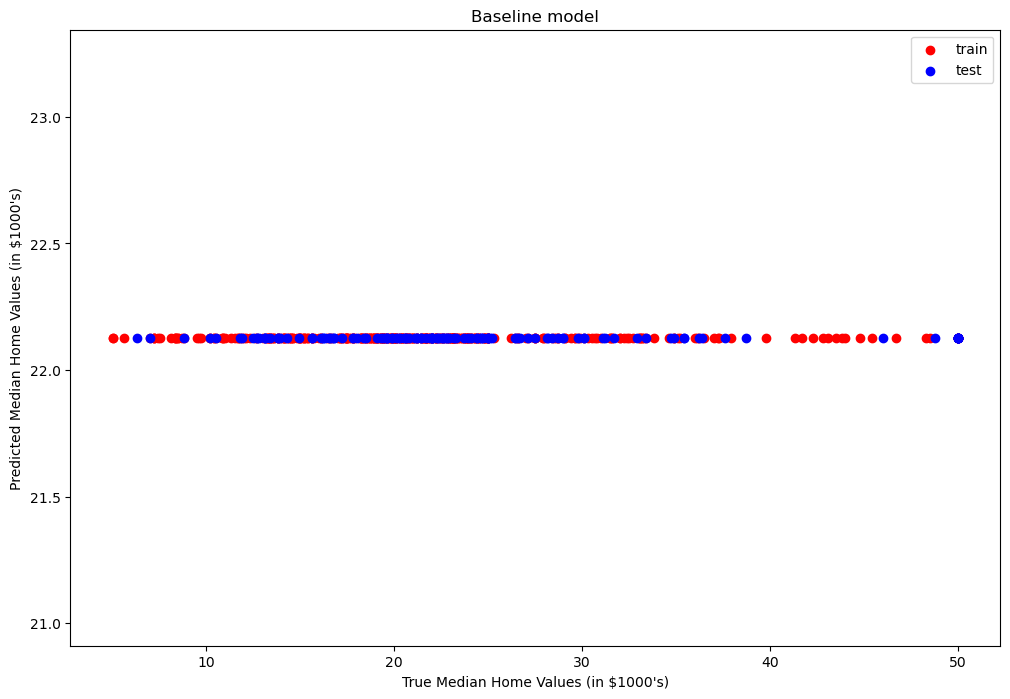

In [618]:
# 4. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis.
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

plt.scatter(bdata_train['MEDV'], baseline_train, c = 'r', marker = 'o', label = 'train')
plt.scatter(bdata_test['MEDV'], baseline_test, c = 'b', marker = 'o', label = 'test')
plt.xlabel("True Median Home Values (in $1000's)")
plt.ylabel("Predicted Median Home Values (in $1000's)")
plt.title('Baseline model')
plt.legend(loc = 'upper right')
plt.show()

---

## Part 2: Nearest Neighbors


### 2.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm][1] distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (4,8) and (3,6), and then compute the Manhattan distance between (2,3) and (11,12).

[1]: https://en.wikipedia.org/wiki/Norm_(mathematics)#p-norm

In [35]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
print(distance((4,8),(3,6),2))


"""
def distance(x1, x2, L):
    # Check for input.
    if type(x1) != np.ndarray:
        x1 = np.array(x1)
    
    if type(x2) != np.ndarray:
        x2 = np.array(x2)
    
    # L-norm distance when x2 has many points in it
    if x2.ndim != 1:
        dist = (np.sum((abs(x1 - x2))**L, axis = 1))**(1/L)
        
    # L-norm distance when x2 has a single point in it
    else:
        dist = (np.sum((abs(x1 - x2))**L))**(1/L)
        
    return dist

print(distance((4,8), (3,6), 2))


2.23606797749979


### 2.2 Basic Nearest Neighbor algorithm

Your next task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use three input features (`CRIM, RM and ZN`) and a single output (`MEDV`).  In other words, you are modelling the relationship between median home value and crime rates, house size and the proportion of residential land zoned for lots.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the `MEDV` value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function. Use L=2 for all questions henceforth unless explicitly stated otherwise.

Make sure to do the following - 
1. Fill in the function specification below
2. Use your algorithm to predict the median home value of every instance in the test set. Report the RMSE ("test RMSE")
3. Use your algorithm to predict the median home value of every instance in the training set and report the training RMSE.
4. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. Color the training instances in red and the test instances in green. 
5. Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.
6. How does the performance (test RMSE and total runtime) of your nearest neighbors algorithm compare to the baseline in part 1.3?

In [36]:
"""
Function
--------
Nearest Neighbors

Implementation of nearest neighbors algorithm.

Parameters
----------
x_train: array
    Array of numerical feature values for training the model.
y_train: array
    Array of numerical output values for training the model.
x_test: array
    Array of numerical feature values for testing the model.
y_test: array
    Array of numerical output values for testing the model.
L: int
    Order of L-norm function used for calculating distance.

Returns
-------
rmse : int
    Value of the RMSE from data.
"""

def nneighbor(x_train, y_train, x_test, y_test, L):
    start_time = time.time()
    
    y_test_predicted = np.zeros(len(x_test))
    
    for i in range(len(x_test)):
        dist = distance(x_test[i], x_train, L)
        y_test_predicted[i] = y_train[np.argmin(dist)]

    
    # Calculate RMSE. 
    rmse = compute_rmse(y_test_predicted, y_test)
    
    # Time for the calculation. 
    time_whole = time.time() - start_time
    
    # Print results. 
    print("The time taken for the whole algorithm is {:.2f} seconds.".format(time_whole))

    return y_test_predicted, rmse, time_whole


In [37]:
# Predict the median home value of every instance in the test set.
y_predicted_test, y_rmse_test, y_time_test = nneighbor(bdata_train[['CRIM','RM', 'ZN']].values, 
                                                       bdata_train['MEDV'].values, 
                                                       bdata_test[['CRIM','RM', 'ZN']].values, 
                                                       bdata_test['MEDV'].values, 
                                                       2)

print("The RMSE of the test data set is {:.2f}.". format(y_rmse_test))

The time taken for the whole algorithm is 0.01 seconds.
The RMSE of the test data set is 7.86.


In [38]:
# Predict the median home value of every instance in the train set.
y_predicted_train, y_rmse_train, y_time_train = nneighbor(bdata_train[['CRIM', 'RM', 'ZN']].values, 
                                                          bdata_train['MEDV'].values, 
                                                          bdata_train[['CRIM','RM', 'ZN']].values, 
                                                          bdata_train['MEDV'].values, 
                                                          2)
print("The RMSE of the train data set is {:.2f}.". format(y_rmse_train))

The time taken for the whole algorithm is 0.01 seconds.
The RMSE of the train data set is 0.00.


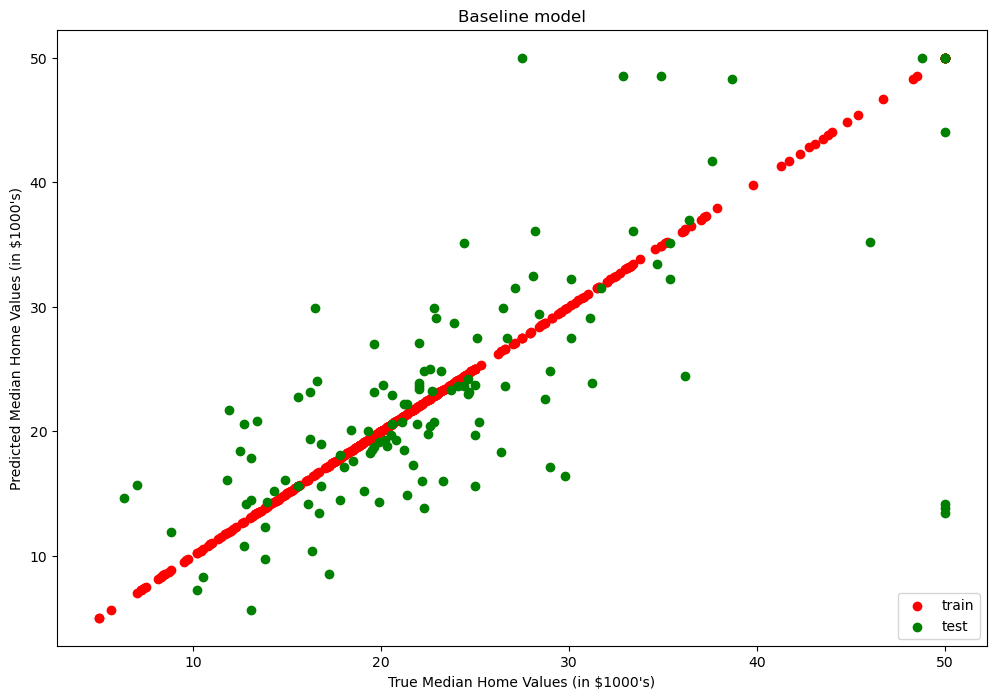

In [39]:
# Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. 
plt.figure(figsize = (12,8))

plt.scatter(bdata_train['MEDV'], y_predicted_train, c = 'r', label = 'train')
plt.scatter(bdata_test['MEDV'], y_predicted_test, c = 'green', label = 'test')
plt.xlabel("True Median Home Values (in $1000's)")
plt.ylabel("Predicted Median Home Values (in $1000's)")
plt.title('Baseline model')
plt.legend(loc = 'lower right')
plt.show()

Compare to the 1.3, the RMSE decreases and the running time does not change a lot.
Overall, it performs better. 


### 2.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the standardized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using `CRIM, RM and ZN` as input), and compare the RMSE from this method with your previous RMSE evaluations. What do you observe?

*NOTE*: To normalize properly, you should compute the mean and standard deviation on the training set, and use the same values to normalize both the training and the testing dataset.

*NOTE 2*: In this case, the normalization may or may not reduce the RMSE; don't get confused if you find that to be the case.

In [40]:
"""
Function
--------
Normalize data

Normalize all of the features in a data frame.

Parameters
----------
raw_data: array
    Array of numerical values to normalize.

Returns
-------
normalized_data : array
    The array with normalized values for all features
"""
def normalize(raw_data):
    
    if raw_data.ndim == 1:
        normalized_data = (raw_data - np.mean(raw_data))/np.std(raw_data)
        
    # If more than one variable
    else:
        normalized_data = (raw_data - np.mean(raw_data, axis = 0))/np.std(raw_data, axis = 0)
    
    return normalized_data


In [41]:
norm_train = normalize(bdata_train[['CRIM', 'RM', 'ZN']].values)
y_predicted_train_norm, y_rmse_train_norm, y_time_train_norm = nneighbor(norm_train, 
                                                                          bdata_train['MEDV'].values, 
                                                                          norm_train, 
                                                                          bdata_train['MEDV'].values, 
                                                                          2)

print("The RMSE of the train data set is {:.2f}.". format(y_rmse_train_norm))

The time taken for the whole algorithm is 0.01 seconds.
The RMSE of the train data set is 0.00.


In [43]:
norm_test = normalize(bdata_test[['CRIM', 'RM', 'ZN']].values)
y_predicted_test_norm, y_rmse_test_norm, y_time_test_norm = nneighbor(norm_train, 
                                                                       bdata_train['MEDV'].values, 
                                                                       norm_test, 
                                                                       bdata_test['MEDV'].values, 
                                                                       2)

print("The RMSE of the test data set is {:.2f}.". format(y_rmse_test_norm))

The time taken for the whole algorithm is 0.01 seconds.
The RMSE of the test data set is 7.86.


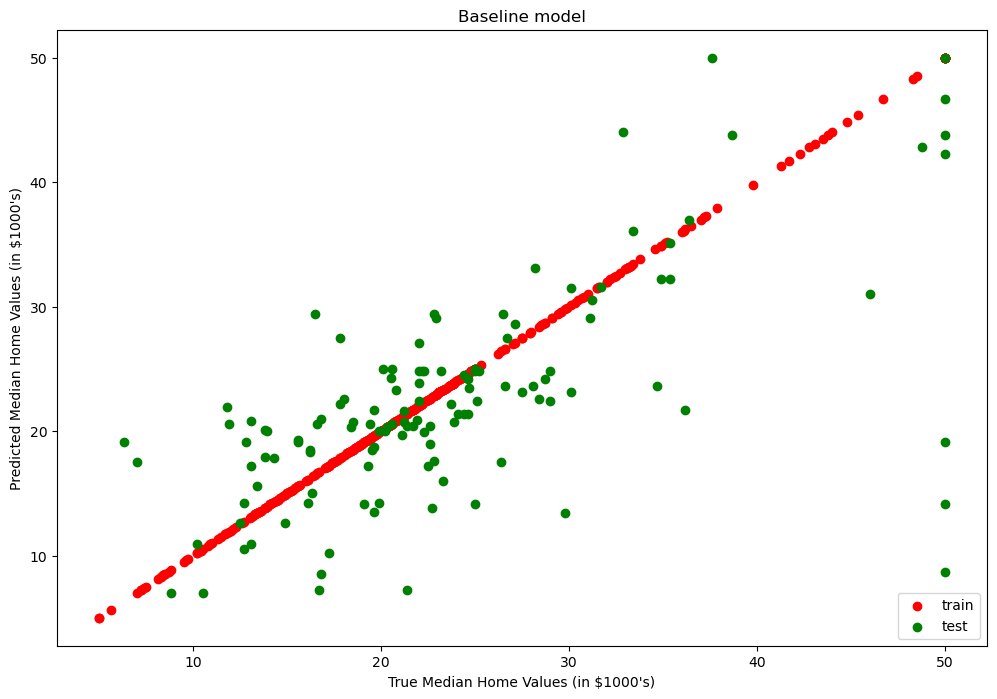

In [44]:
# Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. 
plt.figure(figsize=(12,8))

plt.scatter(bdata_train['MEDV'], y_predicted_train_norm, c = 'r', label = 'train')
plt.scatter(bdata_test['MEDV'], y_predicted_test_norm, c = 'green', label = 'test')
plt.xlabel("True Median Home Values (in $1000's)")
plt.ylabel("Predicted Median Home Values (in $1000's)")
plt.title('Baseline model')
plt.legend(loc = 'lower right')
plt.show()

The running time does not change, but the RMSE decreases just a little bit. 


### 2.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L! Use the test set to report the RMSE values.

What combination of features and distance function provide the lowest RMSE on the test set?  Do your decisions affect the running time of the algorithm?

*NOTE:* For this and all subsequent questions, you should use normalized features. 

In [439]:
bdata_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

The time taken for the whole algorithm is 0.01 seconds.
The RMSE of the train data set is 0.00.
The time taken for the whole algorithm is 0.00 seconds.
The RMSE of the test data set is 11.60.


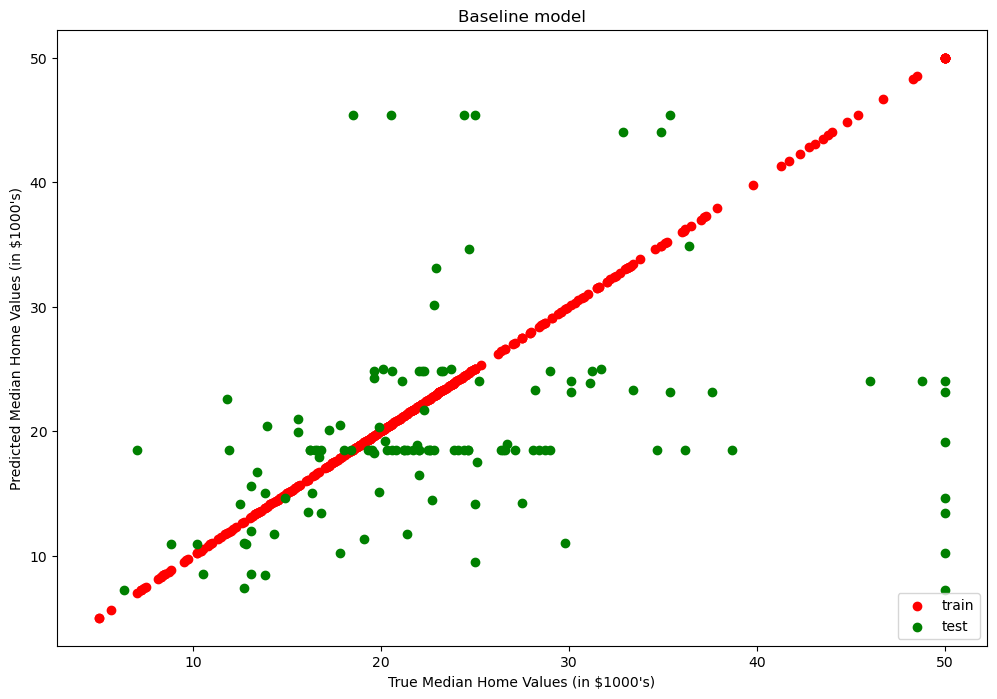

In [45]:
# Model 1: Try a different set of 2 features.
norm_train1 = normalize(bdata_train[['CRIM', 'ZN']].values)
y_predicted_train_norm1, y_rmse_train_norm1, y_time_train_norm1,  = nneighbor(norm_train1, 
                                                          bdata_train['MEDV'].values, 
                                                          norm_train1, 
                                                          bdata_train['MEDV'].values, 
                                                          2)
print("The RMSE of the train data set is {:.2f}.". format(y_rmse_train_norm1))

norm_test1 = normalize(bdata_test[['CRIM', 'ZN']].values)
y_predicted_test_norm1, y_rmse_test_norm1, y_time_test_norm1 = nneighbor(norm_train1, 
                                                       bdata_train['MEDV'].values, 
                                                       norm_test1, 
                                                       bdata_test['MEDV'].values,
                                                       2)
print("The RMSE of the test data set is {:.2f}.". format(y_rmse_test_norm1))


# Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. 
plt.figure(figsize=(12,8))

plt.scatter(bdata_train['MEDV'], y_predicted_train_norm1, c = 'r', label = 'train')
plt.scatter(bdata_test['MEDV'], y_predicted_test_norm1, c = 'green', label = 'test')
plt.xlabel("True Median Home Values (in $1000's)")
plt.ylabel("Predicted Median Home Values (in $1000's)")
plt.title('Baseline model')
plt.legend(loc = 'lower right')
plt.show()

The time taken for the whole algorithm is 0.01 seconds.
The RMSE of the train data set is 0.00.
The time taken for the whole algorithm is 0.00 seconds.
The RMSE of the test data set is 9.58.


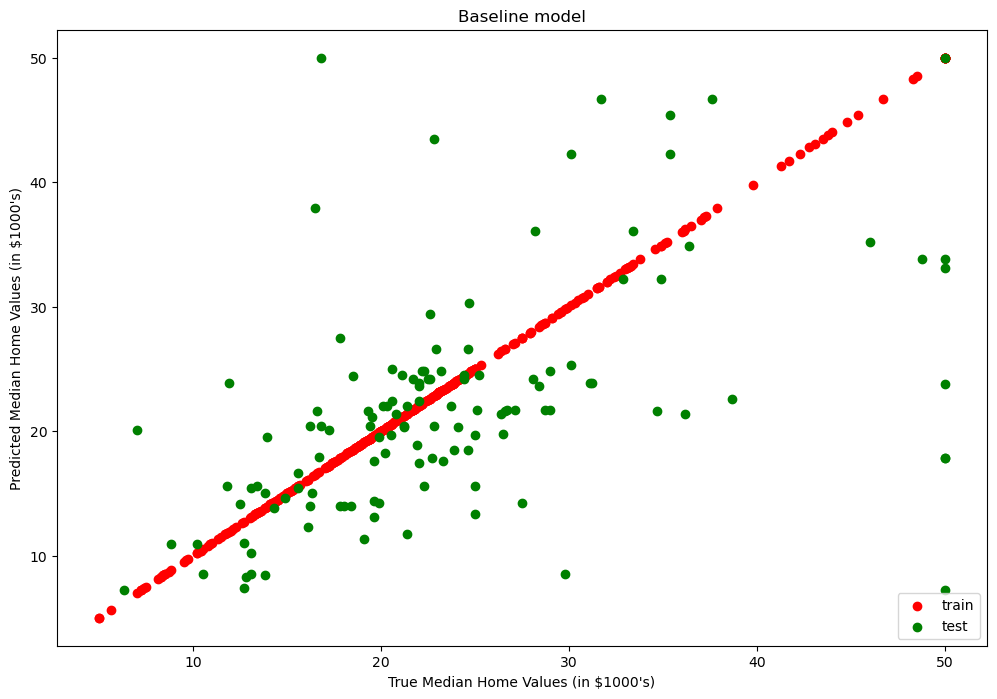

In [48]:
# Try at least one model that uses more than 4 features.

norm_train2 = normalize(bdata_train[['CRIM', 'ZN', 'INDUS', 'CHAS']].values)
y_predicted_train_norm2, y_rmse_train_norm2, y_time_train_norm2 = nneighbor(norm_train2, 
                                                          bdata_train['MEDV'].values, 
                                                          norm_train2, 
                                                          bdata_train['MEDV'].values, 
                                                          2)
print("The RMSE of the train data set is {:.2f}.". format(y_rmse_train_norm2))

norm_test2 = normalize(bdata_test[['CRIM', 'ZN', 'INDUS', 'CHAS']].values)
y_predicted_test_norm2, y_rmse_test_norm2,  y_time_test_norm2= nneighbor(norm_train2, 
                                                       bdata_train['MEDV'].values, 
                                                       norm_test2, 
                                                       bdata_test['MEDV'].values,
                                                       2)
print("The RMSE of the test data set is {:.2f}.". format(y_rmse_test_norm2))


# Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. 
plt.figure(figsize=(12,8))

plt.scatter(bdata_train['MEDV'], y_predicted_train_norm2, c = 'r', label = 'train')
plt.scatter(bdata_test['MEDV'], y_predicted_test_norm2, c = 'green', label = 'test')
plt.xlabel("True Median Home Values (in $1000's)")
plt.ylabel("Predicted Median Home Values (in $1000's)")
plt.title('Baseline model')
plt.legend(loc = 'lower right')
plt.show()

The time taken for the whole algorithm is 0.02 seconds.
The RMSE of the train data set is 0.00.
The time taken for the whole algorithm is 0.01 seconds.
The RMSE of the test data set is 7.82.


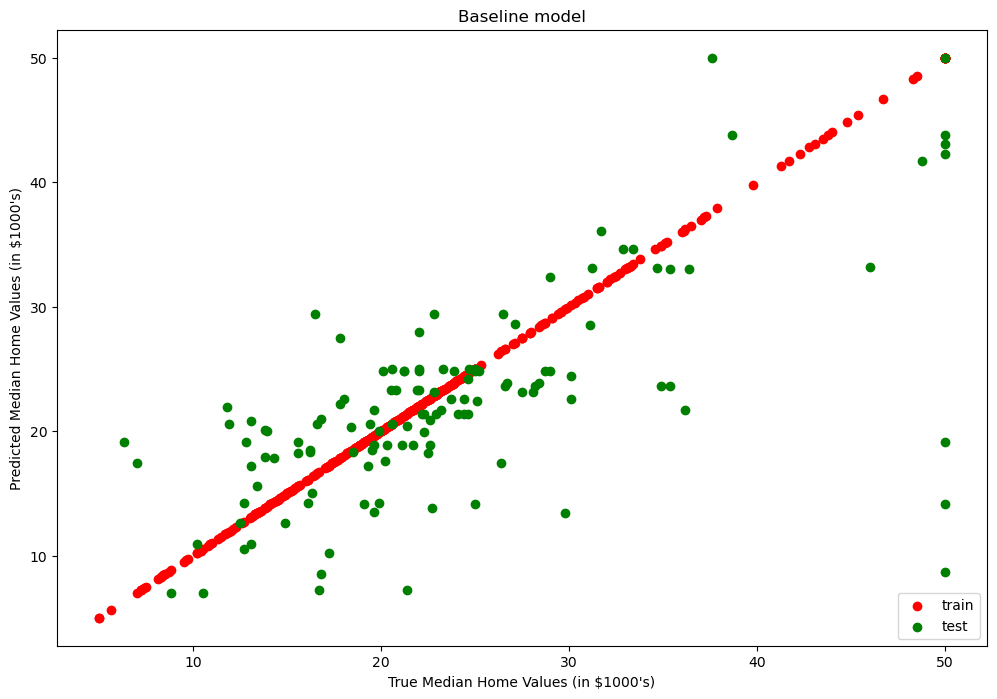

In [53]:
# Try different values of L in the distance function. 
norm_train3 = normalize(bdata_train[['CRIM', 'RM']].values)
y_predicted_train_norm3, y_rmse_train_norm3, y_time_train_norm3 = nneighbor(norm_train3, 
                                                          bdata_train['MEDV'].values, 
                                                          norm_train3, 
                                                          bdata_train['MEDV'].values, 
                                                          3)
print("The RMSE of the train data set is {:.2f}.". format(y_rmse_train_norm3))

norm_test3 = normalize(bdata_test[['CRIM', 'RM']].values)
y_predicted_test_norm3, y_rmse_test_norm3, y_time_test_norm3 = nneighbor(norm_train3, 
                                                       bdata_train['MEDV'].values, 
                                                       norm_test3, 
                                                       bdata_test['MEDV'].values,
                                                       3)
print("The RMSE of the test data set is {:.2f}.". format(y_rmse_test_norm3))

# Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. 
plt.figure(figsize=(12,8))

plt.scatter(bdata_train['MEDV'], y_predicted_train_norm3, c = 'r', label = 'train')
plt.scatter(bdata_test['MEDV'], y_predicted_test_norm3, c = 'green', label = 'test')
plt.xlabel("True Median Home Values (in $1000's)")
plt.ylabel("Predicted Median Home Values (in $1000's)")
plt.title('Baseline model')
plt.legend(loc = 'lower right')
plt.show()

The time taken for the whole algorithm is 0.02 seconds.
The RMSE of the train data set is 0.00.
The time taken for the whole algorithm is 0.01 seconds.
The RMSE of the test data set is 8.03.


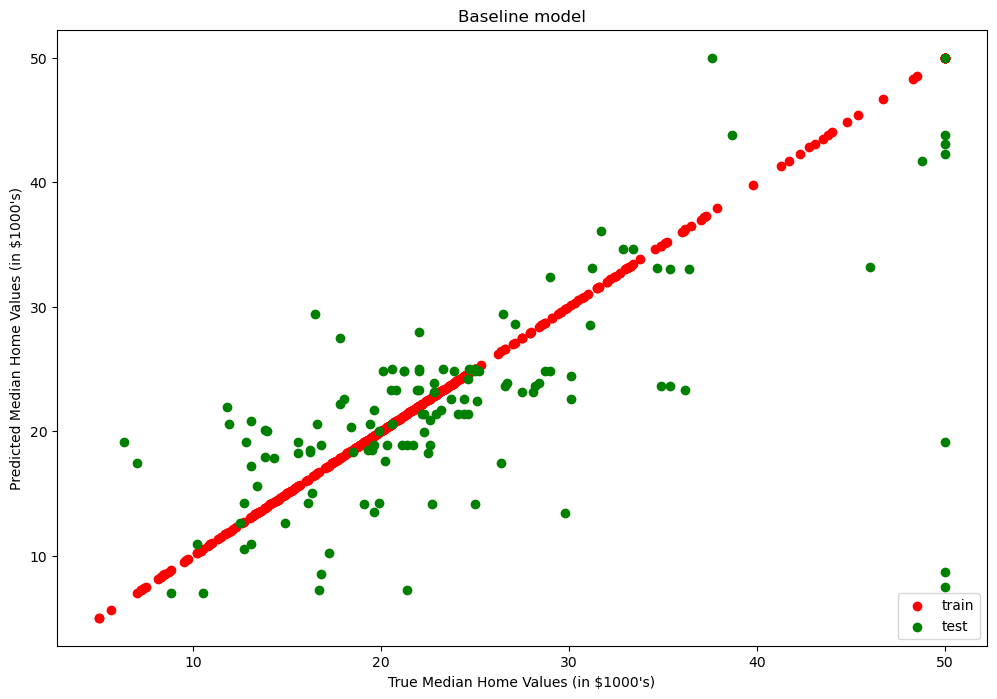

In [52]:
norm_train4 = normalize(bdata_train[['CRIM', 'RM']].values)
y_predicted_train_norm4, y_rmse_train_norm4, y_time_train_norm4 = nneighbor(norm_train4, 
                                                          bdata_train['MEDV'].values, 
                                                          norm_train4, 
                                                          bdata_train['MEDV'].values, 
                                                          4)
print("The RMSE of the train data set is {:.2f}.". format(y_rmse_train_norm4))

norm_test4 = normalize(bdata_test[['CRIM', 'RM']].values)
y_predicted_test_norm4, y_rmse_test_norm4,  y_time_test_norm4 = nneighbor(norm_train4, 
                                                       bdata_train['MEDV'].values, 
                                                       norm_test4, 
                                                       bdata_test['MEDV'].values,
                                                       4)
print("The RMSE of the test data set is {:.2f}.". format(y_rmse_test_norm4))

# Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. 
plt.figure(figsize=(12,8))

plt.scatter(bdata_train['MEDV'], y_predicted_train_norm4, c = 'r', label = 'train')
plt.scatter(bdata_test['MEDV'], y_predicted_test_norm4, c = 'green', label = 'test')
plt.xlabel("True Median Home Values (in $1000's)")
plt.ylabel("Predicted Median Home Values (in $1000's)")
plt.title('Baseline model')
plt.legend(loc = 'lower right')
plt.show()

The time taken for the whole algorithm is 0.03 seconds.
The RMSE of the train data set is 0.00.
The time taken for the whole algorithm is 0.01 seconds.
The RMSE of the test data set is 9.59.


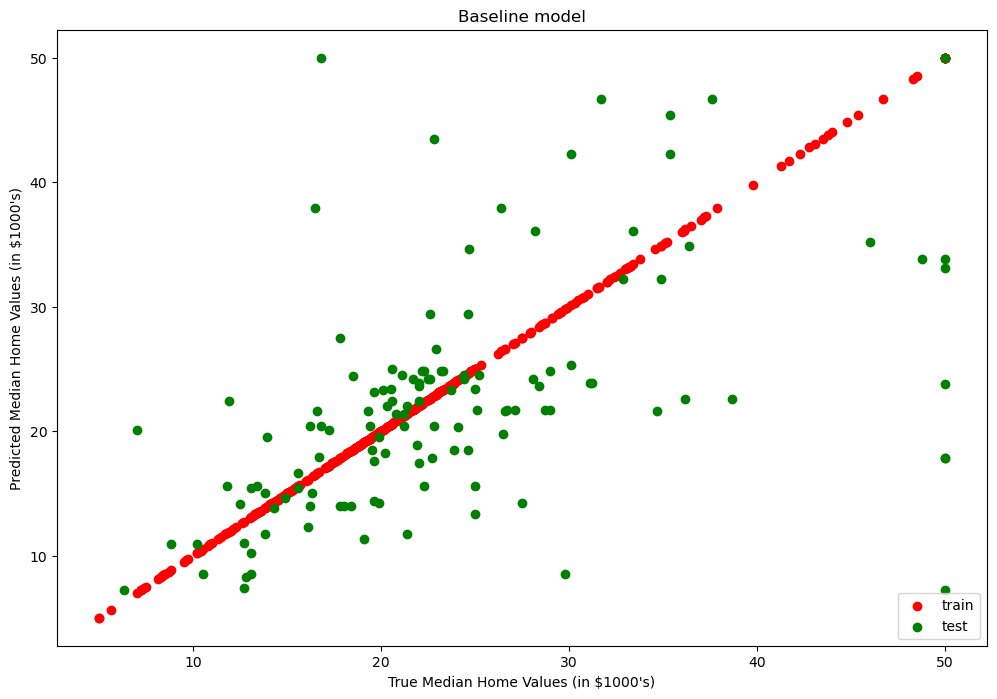

In [50]:
# Try a few different combinations of features and L.
norm_train5 = normalize(bdata_train[['CRIM', 'ZN', 'INDUS', 'CHAS']].values)
y_predicted_train_norm5, y_rmse_train_norm5, y_time_train_norm5 = nneighbor(norm_train5, 
                                                          bdata_train['MEDV'].values, 
                                                          norm_train5, 
                                                          bdata_train['MEDV'].values, 
                                                          4)
print("The RMSE of the train data set is {:.2f}.". format(y_rmse_train_norm5))

norm_test5 = normalize(bdata_test[['CRIM', 'ZN', 'INDUS', 'CHAS']].values)
y_predicted_test_norm5, y_rmse_test_norm5,  y_time_test_norm5 = nneighbor(norm_train5, 
                                                       bdata_train['MEDV'].values, 
                                                       norm_test5, 
                                                       bdata_test['MEDV'].values,
                                                       4)
print("The RMSE of the test data set is {:.2f}.". format(y_rmse_test_norm5))

# Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. 
plt.figure(figsize=(12,8))

plt.scatter(bdata_train['MEDV'], y_predicted_train_norm5, c = 'r', label = 'train')
plt.scatter(bdata_test['MEDV'], y_predicted_test_norm5, c = 'green', label = 'test')
plt.xlabel("True Median Home Values (in $1000's)")
plt.ylabel("Predicted Median Home Values (in $1000's)")
plt.title('Baseline model')
plt.legend(loc = 'lower right')
plt.show()

The time taken for the whole algorithm is 0.03 seconds.
The RMSE of the train data set is 0.00.
The time taken for the whole algorithm is 0.01 seconds.
The RMSE of the test data set is 9.59.


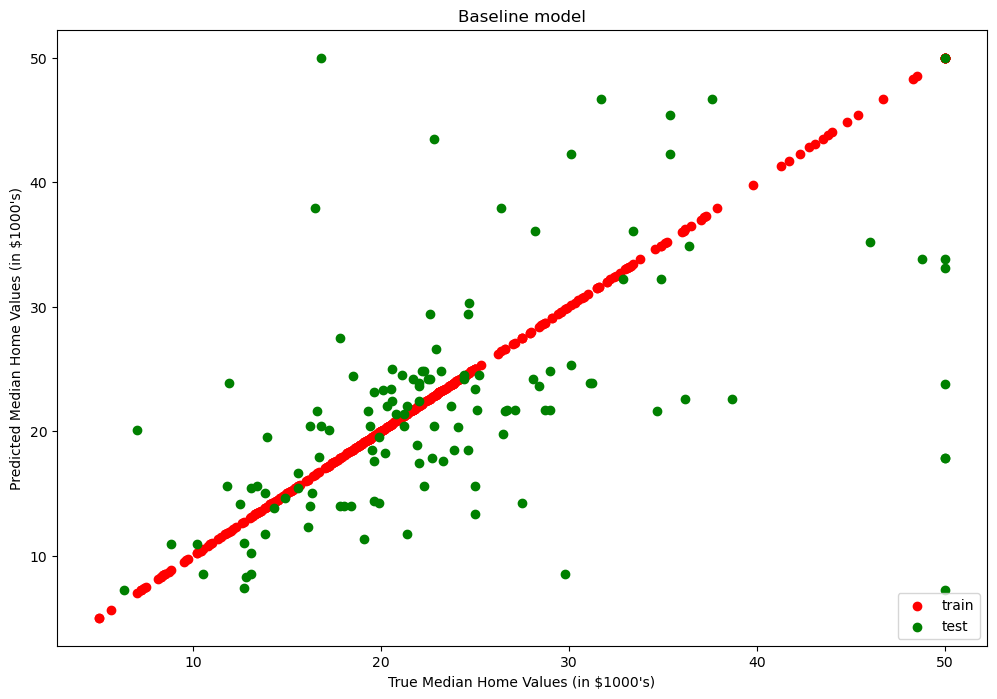

In [51]:
# Try a few different combinations of features and L.
norm_train6 = normalize(bdata_train[['CRIM', 'ZN', 'INDUS', 'CHAS']].values)
y_predicted_train_norm6, y_rmse_train_norm6,  y_time_train_norm6 = nneighbor(norm_train6, 
                                                          bdata_train['MEDV'].values, 
                                                          norm_train6, 
                                                          bdata_train['MEDV'].values, 
                                                          3)
print("The RMSE of the train data set is {:.2f}.". format(y_rmse_train_norm6))

norm_test6 = normalize(bdata_test[['CRIM', 'ZN', 'INDUS', 'CHAS']].values)
y_predicted_test_norm6, y_rmse_test_norm6, y_time_test_norm6 = nneighbor(norm_train6, 
                                                       bdata_train['MEDV'].values, 
                                                       norm_test6, 
                                                       bdata_test['MEDV'].values,
                                                       3)
print("The RMSE of the test data set is {:.2f}.". format(y_rmse_test_norm6))

# Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. 
plt.figure(figsize=(12,8))

plt.scatter(bdata_train['MEDV'], y_predicted_train_norm6, c = 'r', label = 'train')
plt.scatter(bdata_test['MEDV'], y_predicted_test_norm6, c = 'green', label = 'test')
plt.xlabel("True Median Home Values (in $1000's)")
plt.ylabel("Predicted Median Home Values (in $1000's)")
plt.title('Baseline model')
plt.legend(loc = 'lower right')
plt.show()

We can see that the combination features of 'CRIM', 'RM' with L=3 from the above results get the smallest RMSE. But the running time is a little bit longer compared to L=2. 

### 2.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  One solution to this sort of overfitting is to use cross-validation (see K-fold [cross-validation][1].  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold][2] iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 25-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with `CRIM,RM and ZN` input features, as well as the total running time for the full run of 25 folds.  In other words, randomly divide your training dataset (created in 1.2) into 25 equally-sized samples.

For each of the 25 iterations (the "folds"), use 24 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for validation.  Compute the RMSE of that particular validation set, then move on to the next iteration.  

 - Report the average cross-validated RMSE across the 25 iterations. What do you observe?
 
 - Create a histogram of the RMSEs for the folds (there should be 25 of these). Additionally, use a horizontal line to mark the average cross-validated RMSE.


[1]: http://en.wikipedia.org/wiki/Cross-validation_(statistics)
[2]: http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation



NOTE: To perform any randomized operation, only use functions in the *numpy library (np.random)*. Do not use other packages for random functions.

HINT: Running 25-fold cross validation might be time-consuming. Try starting with 5 folds.

In [62]:
# Normalize the full dataset
np.random.seed(seed=1429)

norm_train = pd.DataFrame(norm_train, columns = ['CRIM', 'RM', 'ZN']) if type(norm_train) is not pd.DataFrame else norm_train

fold_index = np.random.choice(range(len(norm_train)), len(norm_train), replace = False)

k = 25

rmse = np.zeros(k)
t = np.zeros(k)

partitions = [int(x) for x in np.linspace(0, len(norm_train), k+1, endpoint = True)]

fold_index = np.array([fold_index[partitions[i]:partitions[i+1]] for i in range(k)])

for i in range(k):
    norm_train.loc[fold_index[i], 'fold'] = i+1
    bdata_norm_train = norm_train[norm_train['fold'] != (i+1)]
    bdata_norm_test = norm_train[norm_train['fold'] == (i+1)]
    y_train = bdata_train['MEDV'][norm_train['fold'] != (i+1)]
    y_test = bdata_train['MEDV'][norm_train['fold'] == (i+1)]

    y_test_predicted_n, rmse_n, t_n = nneighbor(bdata_norm_train.drop('fold', axis = 1).values,
                                                       y_train.values,
                                                       bdata_norm_test.drop('fold', axis = 1).values,
                                                       y_test.values,
                                                       2)
    rmse[i] = rmse_n
    t[i] = t_n
    print("The RMSE of the test data set is {:.2f}.". format(rmse_n))

The time taken for the whole algorithm is 0.00 seconds.
The RMSE of the test data set is 5.58.
The time taken for the whole algorithm is 0.00 seconds.
The RMSE of the test data set is 4.94.
The time taken for the whole algorithm is 0.00 seconds.
The RMSE of the test data set is 9.38.
The time taken for the whole algorithm is 0.00 seconds.
The RMSE of the test data set is 5.52.
The time taken for the whole algorithm is 0.00 seconds.
The RMSE of the test data set is 5.69.
The time taken for the whole algorithm is 0.00 seconds.
The RMSE of the test data set is 11.35.
The time taken for the whole algorithm is 0.00 seconds.
The RMSE of the test data set is 4.76.
The time taken for the whole algorithm is 0.00 seconds.
The RMSE of the test data set is 3.81.
The time taken for the whole algorithm is 0.00 seconds.
The RMSE of the test data set is 5.95.
The time taken for the whole algorithm is 0.00 seconds.
The RMSE of the test data set is 3.46.
The time taken for the whole algorithm is 0.00 se

/var/folders/z1/j91g8rbs0z5_97z1vqszz6lw0000gn/T/ipykernel_10895/4041575063.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fold_index = np.array([fold_index[partitions[i]:partitions[i+1]] for i in range(k)])


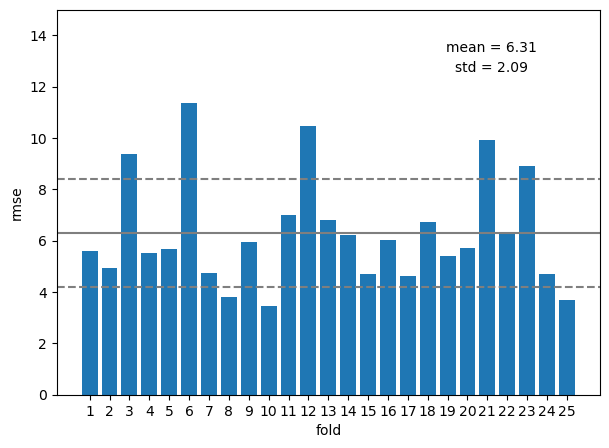

11.352356583546872

In [64]:
# Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. 
np.random.seed(seed=1429)

fig, ax = plt.subplots(figsize=(7,5))

# rmse
ax.bar(np.arange(25)+1, rmse)

# mean and standard deviation
mean_rmse = np.mean(rmse)
std_rmse = np.std(rmse)
ax.axhline(mean_rmse, c='C7')
ax.axhline(mean_rmse+std_rmse, c='C7', ls='--')
ax.axhline(mean_rmse-std_rmse, c='C7', ls='--')
ax.text(0.8,0.9,'mean = {:.2f}'.format(mean_rmse),
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.8,0.85,'std = {:.2f}'.format(std_rmse),
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.set_xlabel('fold')
ax.set_ylabel('rmse')
ax.set_xticks(np.arange(25)+1)
ax.set_ylim(0,15)

plt.show(fig)

In [67]:
print("The highest rmse is {:.2f}.". format(max(rmse)))
print("The lowest rmse is {:.2f}.". format(min(rmse)))
print("The Mean of rmse is {:.2f}.". format(mean_rmse))
print("The Standard deivation of rmse is {:.2f}.". format(std_rmse))

The highest rmse is 11.35.
The lowest rmse is 3.46.
The Mean of rmse is 6.31.
The Standard deivation of rmse is 2.09.


This suggests that using CRIM, RM, and ZN to estimate MEDV with L = 2 does not predict well. It also takes more time than a single split.

### 2.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Use 10-fold cross validation and L2 normalization, and the same features as in 2.5. Report the RMSE for K=15 and the running time of the algorithm. What do you observe?

In [69]:
"""
Function
--------
K-Nearest Neighbors

Implementation of nearest neighbors algorithm.

Parameters
----------
x_train: array
    Array of numerical feature values for training the model.
y_train: array
    Array of numerical output values for training the model.
x_test: array
    Array of numerical feature values for testing the model.
y_test: array
    Array of numerical output values for testing the model.
L: int
    Order of L-norm function used for calculating distance.
K: int
    Neighbors to include in algorithm
    
Returns
-------
rmse : int
    Value of the RMSE from data.
"""

def knn(x_train, y_train, x_test, y_test, L, K):
    y_test_predicted = np.zeros(len(x_test))
    
    for i in range(len(x_test)):
        dist = distance(x_test[i], x_train, L)
        y_test_predicted[i] = np.mean(y_train[dist.argsort()[:K]])
            
    rmse_fold = compute_rmse(y_test_predicted, y_test)
    
    return rmse_fold


In [68]:
def knn_cv(X, Y, F, L, K):
    start_time = time.time()
    
    rmse_folds = np.zeros(F)
    
    fold_index = np.random.choice(range(len(X)), len(X), replace = False)
    
    partitions = [int(x) for x in np.linspace(0, len(X), F+1, endpoint = True)]

    fold_index = np.array([fold_index[partitions[i]:partitions[i+1]] for i in range(F)])
    
    for i in range(F):
        X.loc[fold_index[i], 'fold'] = i+1
        X_train = X[X['fold'] != (i+1)]
        X_test = X[X['fold'] == (i+1)]
        Y_train = Y[X['fold'] != (i+1)]
        Y_test = Y[X['fold'] == (i+1)]

        rmse_folds[i] = knn(X_train.drop('fold', axis = 1), Y_train, X_test.drop('fold', axis = 1).values, Y_test, L, K)
    
    mean_rmse = np.mean(rmse_folds)  
    time_whole = time.time() - start_time
    print("The time taken for the whole algorithm is {:.2f} seconds.".format(time_whole))
    return mean_rmse


In [70]:
X = norm_train
Y = bdata_train['MEDV'].values

In [71]:
mean_rmse = knn_cv(X,Y, F=10, L=2, K=15)
print("The rmse of knn is {:.2f}.". format(mean_rmse))

The time taken for the whole algorithm is 0.08 seconds.
The rmse of knn is 4.95.


The results perform better and the RMSE is smaller than basic nearest Neighbors, though the total running time is bigger. 

### 2.7 Using cross validation to find K

Compute the cross-validated RMSE for values of K between 1 and 25 using 10-fold cross-validation and L2 normalization.  Use the following features in your model: `CRIM, ZN, RM, AGE, DIS, TAX`.  Create a graph that shows how cross-validated RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

Finally, report the test RMSE using the value of K that minimized the cross-validated RMSE. (Continue to use L2 normalization and the same set of features). How does the test RMSE compare to the cross-validated RMSE, and is this what you expected? How does the test RMSE compare to the test RMSE from 2.4, and is this what you expected?


The time taken for the whole algorithm is 0.08 seconds.
The time taken for the whole algorithm is 0.06 seconds.
The time taken for the whole algorithm is 0.06 seconds.
The time taken for the whole algorithm is 0.05 seconds.
The time taken for the whole algorithm is 0.09 seconds.
The time taken for the whole algorithm is 0.05 seconds.
The time taken for the whole algorithm is 0.05 seconds.
The time taken for the whole algorithm is 0.05 seconds.
The time taken for the whole algorithm is 0.05 seconds.
The time taken for the whole algorithm is 0.05 seconds.
The time taken for the whole algorithm is 0.05 seconds.
The time taken for the whole algorithm is 0.05 seconds.
The time taken for the whole algorithm is 0.05 seconds.
The time taken for the whole algorithm is 0.05 seconds.
The time taken for the whole algorithm is 0.05 seconds.
The time taken for the whole algorithm is 0.05 seconds.
The time taken for the whole algorithm is 0.05 seconds.
The time taken for the whole algorithm is 0.04 s

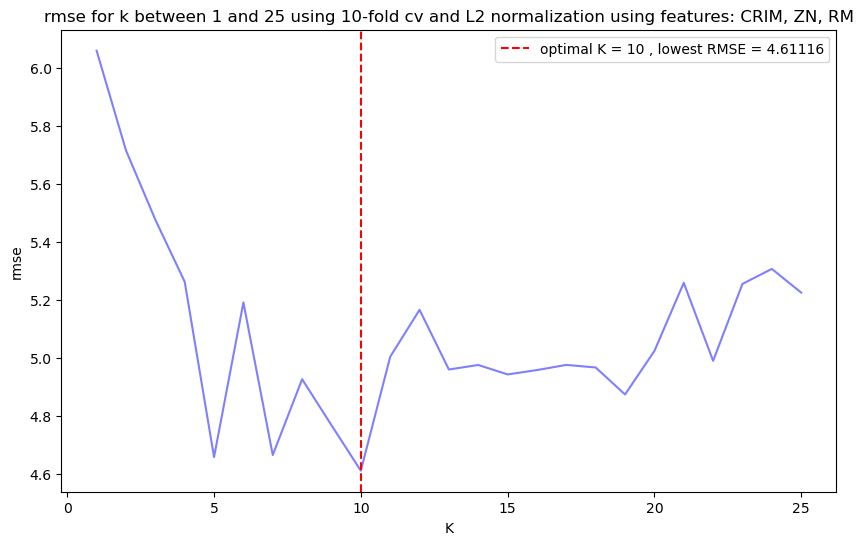

In [72]:
max_K = 25
rmse_K = np.zeros(max_K)

for i in range(max_K):
    rmse= knn_cv(X, Y, F=10, L=2, K=i+1)
    rmse_K[i] = rmse

optimal_K = np.argmin(rmse_K) + 1
    
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, max_K+1), rmse_K, color='blue', alpha=0.5)
plt.axvline(x=optimal_K, color='red', linestyle='--', label='optimal K = {} , lowest RMSE = {}'.format(optimal_K, round(rmse_K[optimal_K-1], 5)))
plt.xlabel('K')
plt.ylabel('rmse')
plt.title('rmse for k between 1 and 25 using 10-fold cv and L2 normalization using features: CRIM, ZN, RM')
plt.legend()
plt.show()


In [88]:
print("The best choice of K is " + str(optimal_K))
lowest_rmse = rmse_K[optimal_K - 1]
print("The lowest RMSE value is {:.2f}".format(lowest_rmse))

The best choice of K is 10
The lowest RMSE value is 4.61


From the graph, we can see that the RMSE decreases intitally with increase in the value of K, but after the best choice of k, it starts increasing again. The lowest RMSE value is smaller than any values we got previously. The results are better than the one in 2.4 which matches my expectation. 

### Extra-Credit: Forward selection

Thus far the choice of predictor variables has been rather arbitrary. For extra credit, implement a basic [forward selection](https://see.stanford.edu/materials/aimlcs229/cs229-notes5.pdf) algorithm to progressively include features that decrease the cross-validated RMSE of the model. Note that the optimal value of K may be different for each model, so you may want to use cross-validation to choose K each time (but it is also fine if you fix K at the optimal value from 2.7).  Create a graph that shows RMSE as a function of the number of features in the model. Label each point on the x-axis with the name of the feature that is added at that step in the forward selection algorithm. *(For instance, if the optimal single-feature model has CRIM with RMSE = 10, and the optimal two-feature model has CRIM+ZN with RMSE=9, the first x-axis label will say CRIM and the second x-axis lable with say ZN)*